Лабораторная работа по теме Проверка статистических гипотез
Выполнил студент 1 курса магистратуры Аналитака данных - Владислав Шкаровский, группа S4101

In [453]:
# Первым делом импортируем необходимые библиотеки и настроим отображение
import os
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

matplotlib.style.use('ggplot')
%matplotlib inline

In [455]:
# Назначим папку рабочей директории проекта
os.chdir("E:\\ИТМО\\Магистратура\\01 Семестр\\Анализ данных на Python\\Задачи для лабораторной 4 вер2\\Ames_dataset")

In [457]:
# Импортируем данные из файла используя разделитель ';' и отобразим первые записи
AH = pd.read_csv('AmesHousing.txt', sep="\t")
AH.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [459]:
# Группы определяются по значениям количественных переменных, 
# то есть по переменным из списка, определенного командой 
AH.describe(include=[np.number])

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [461]:
# ПЕРВОЕ СРАВНЕНИЕ ЦЕН ДОМОВ "СТАРЫХ" И "НОВЫХ"
# Находим медиану для того что бы разделить данные на две группы "старые" и "новые" дома
Me = AH['Year Built'].median()
Me

1973.0

In [463]:
# Вывожу группу со "старыми" домами
# Проверяем нормальность
AH_old = AH[(AH['Year Built'] < Me)]
AH_old['SalePrice'].sort_values(ascending=False)

2666    475000
2737    415000
1537    381000
956     375000
2214    359100
         ...  
2880     35311
2843     35000
726      34900
1553     13100
181      12789
Name: SalePrice, Length: 1450, dtype: int64

In [465]:
# Вывожу группу со "новыми" домами
# Проверяем нормальность
AH_new = AH[(AH['Year Built'] >= Me)]
AH_new['SalePrice'].sort_values(ascending=False)

1767    755000
1760    745000
2445    625000
1063    615000
44      611657
         ...  
2907     84500
326      83500
2366     83000
372      82500
2290     75190
Name: SalePrice, Length: 1480, dtype: int64

In [467]:
# Назначаем переменую для данных
data_year = (AH_new['SalePrice'], AH_old['SalePrice'])

In [469]:
# Функция для вывода двух гистограмм одновременно
bins = 10 # переменная определяющая кол-во столбцов в гистограмме
def two_histograms(x,y):
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x), bins=bins)
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y), bins=bins)
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])
# Проверяем равенство дисперсий

In [471]:
# назначим имена для легенды
AH_new['SalePrice'].name, AH_old['SalePrice'].name = 'New', 'Old'

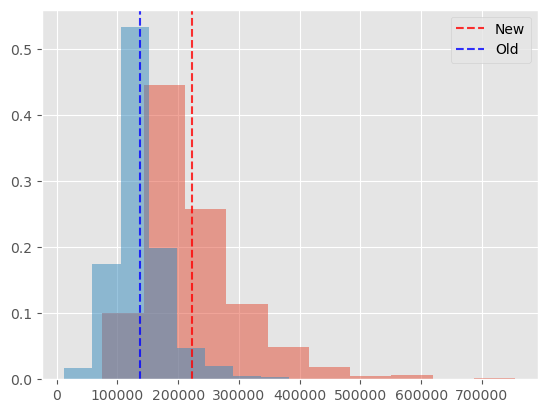

In [473]:
# Построим гисограммы при помощи определенной ранее функции
two_histograms(*data_year)

In [475]:
# В распределении есть выбросы, которыми мы можем убрать
# Уберем выбросы для новых домов
AH_new = AH[(AH['Year Built'] >= Me) & (AH['SalePrice'] < 500000)]
# назначим имена для легенды
AH_new['SalePrice'].name = 'New'

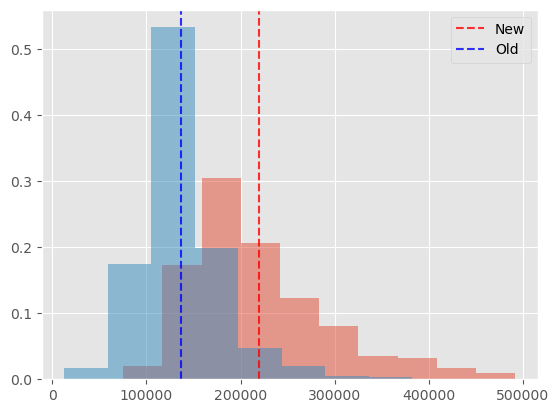

In [477]:
# Построим гисограммы при помощи определенной ранее функции
data_year = (AH_new['SalePrice'], AH_old['SalePrice'])
two_histograms(*data_year)

In [479]:
# В распределении нет очевидных выбросов, гистограммы колоколообразные существенных отклонений от нормальности не наблюдается
# а это значит что мы можем применить критерий T Стюдента.

In [481]:
# Перед применение критерия Стюдента проверим гипотезу о равенстве дисперсий с помощью критерия Флингнера-Килина
res = stats.fligner(*data_year)
print('p-value: ', res[1] > 0.05)

p-value:  False


In [483]:
# p-value низкое,  это  значит гипотезу о равенстве дисперсий отвергаем.
# В двух выборках находятся разные наблюдаемые объекты то есть не связные.

In [485]:
# Будем проверять с помощью ttest_ind с опцией equal_var=False
res = stats.ttest_ind(*data_year, equal_var=False)
res[1] > 0.05

False

In [447]:
# p-значение меньше чем α гипотезу о равенстве отвергаем, цены "новых" и "старых" домов отличаются статистически значимо

<Axes: xlabel='Old/New', ylabel='SalePrice'>

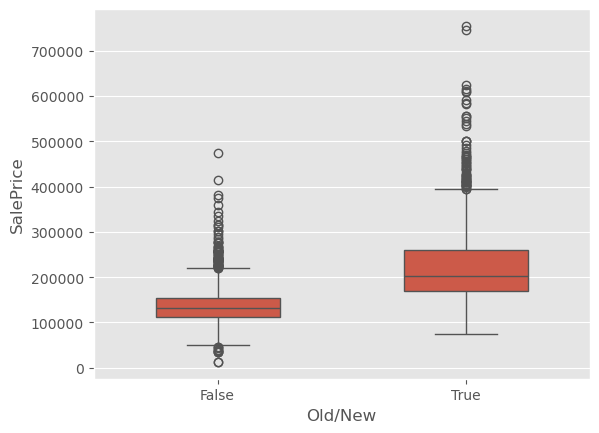

In [489]:
# Проилюстрирую результат ящиком с усами
# Добавлю группирующую переменную для "старых/новых" домов
AH['Old/New'] = AH['Year Built'] >= Me
# Ящик с усами для "старых(false)" и "новых(true)" домов
sns.boxplot(data=AH, y='SalePrice', x='Old/New', width=.5)

In [15]:
# ВТОРОЕ СРАВНЕНИЕ
# Влияет ли длина улицы граничащая с участком

In [491]:
# Вывожу группу с "длинными" участками
AH_long = AH[AH['Lot Frontage'] >= Me_2]
AH_long['SalePrice'].sort_values(ascending=False)

1767    755000
1760    745000
2445    625000
1063    615000
44      611657
         ...  
2689     52500
2879     51689
727      44000
1553     13100
181      12789
Name: SalePrice, Length: 1245, dtype: int64

In [493]:
# Вывожу группу с "короткими" участками
AH_short = AH[AH['Lot Frontage'] < Me_2]
AH_short['SalePrice'].sort_values(ascending=False)

1637    591587
2330    545224
15      538000
366     501837
1701    500067
         ...  
1901     39300
709      37900
2880     35311
2843     35000
726      34900
Name: SalePrice, Length: 1195, dtype: int64

In [495]:
# Назначаем переменую для данных
data_frontage = (AH_short['SalePrice'], AH_long['SalePrice'])

In [369]:
# назначим имена для легенды
AH_short['SalePrice'].name, AH_long['SalePrice'].name = 'Short', 'Long'

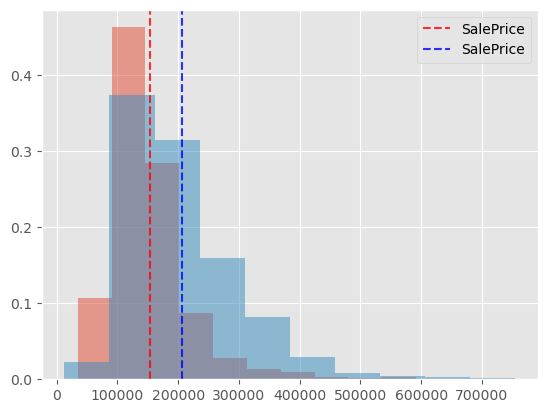

In [497]:
# Построим гисограммы при помощи определенной ранее функции
two_histograms(*data_frontage)

In [499]:
# В распределении есть выбросы, которыми мы можем убрать
# Уберем выбросы для для участков с короткой улицей
AH_short = AH[(AH['Lot Frontage'] < Me_2) & (AH['SalePrice'] < 500000)]

In [509]:
# назначим имена для легенды
AH_short['SalePrice'].name, AH_long['SalePrice'].name = 'Short', 'Long'

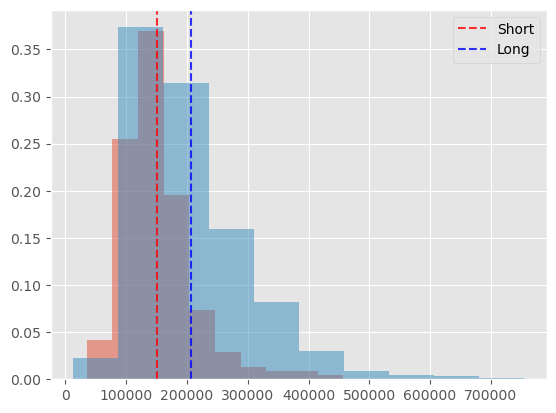

In [511]:
# Построим гисограммы при помощи определенной ранее функции
data_frontage = (AH_short['SalePrice'], AH_long['SalePrice'])
two_histograms(*data_frontage)

In [397]:
# В распределении нет очевидных выбросов, гистограммы колоколообразные, существенных отклонений от нормальности не наблюдается, сильной ассиметрие нет
# а это значит что мы можем применить T-критерий Стюдента.

In [503]:
# Перед применение критерия Стюдента проверим гипотезу о равенстве дисперсий с помощью критерия Флингнера-Килина
res = stats.fligner(*data_frontage)
print('p-value: ', res[1] > 0.05)

p-value:  False


In [ ]:
# p-value низкое,  это  значит гипотезу о равенстве дисперсий отвергаем.
# В двух выборках находятся разные наблюдаемые объекты то есть не связные.

In [505]:
# Будем проверять с помощью ttest_ind с опцией equal_var=False
res = stats.ttest_ind(*data_frontage, equal_var=False)
res[1] > 0.05

False

In [ ]:
# p-значение меньше чем α гипотезу о равенстве отвергаем, 
# цены "коротких" и "длинных" участкоа отличаются статистически значимо

<Axes: xlabel='Short/Long', ylabel='SalePrice'>

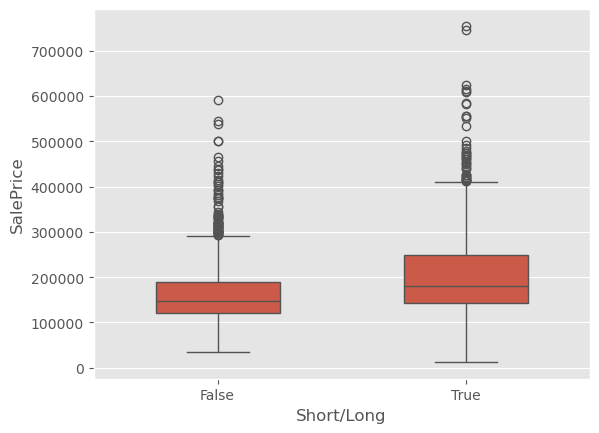

In [507]:
# Проилюстрирую результат ящиком с усами
# Добавлю группирующую переменную для "коротких/длинных" участков
# Добавлю группирующую переменную для "коротких/длинных" участков
AH['Short/Long'] = AH['Lot Frontage'] >= Me_2
# Ящик с усами для "коротких(false)" и "длинных(true)" участков
sns.boxplot(data=AH, y='SalePrice', x='Short/Long', width=.5)

In [34]:
# Мой github: https://github.com/0z0nize